In [1]:
import cv2;
import numpy as np;
from matplotlib import pyplot as plt
def tampil_plot(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def figure():
    return plt.figure(num=None, figsize=(15, 20), dpi=100)

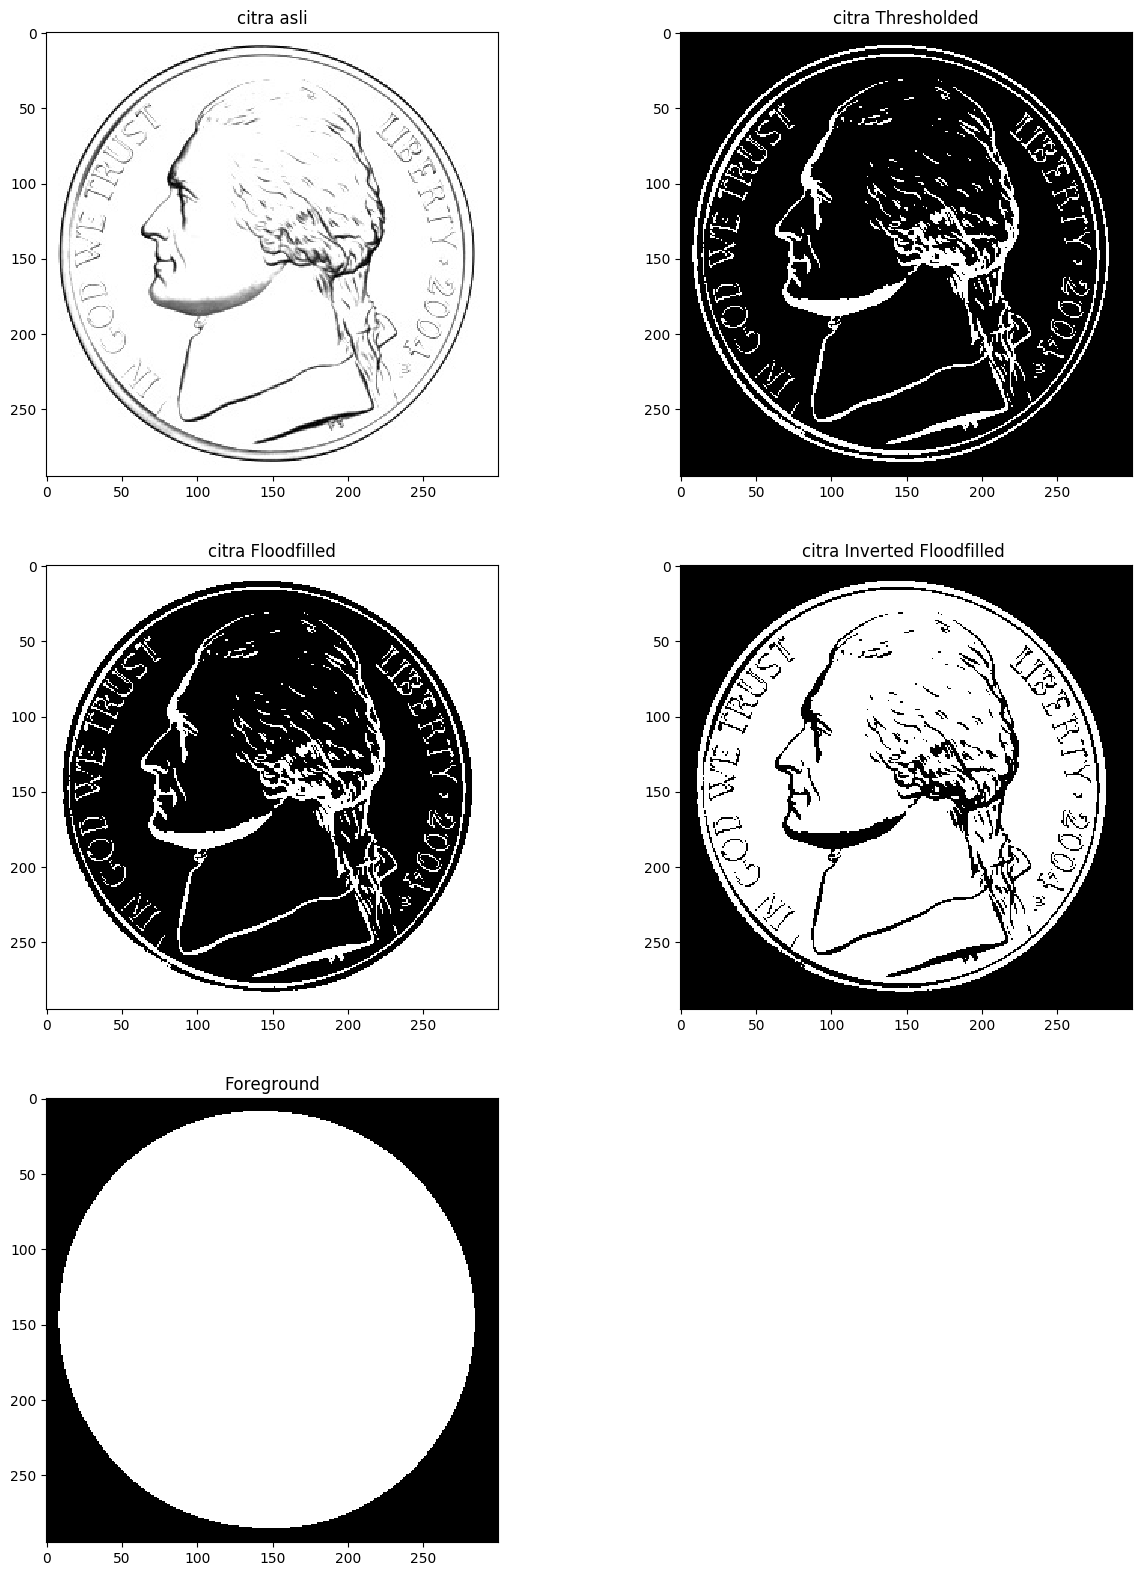

In [3]:
# Read image
im_in = cv2.imread("../bahan/nickel.jpg", cv2.IMREAD_GRAYSCALE);
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.

th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV);

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255)

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_out = im_th |im_floodfill_inv

# # Display images.
figure()
plt.subplot(3, 2, 1), plt.imshow(cv2.cvtColor(im_in, cv2.COLOR_BGR2RGB)), plt.title('citra asli')
plt.subplot(3, 2, 2), plt.imshow(tampil_plot(im_th)), plt.title('citra Thresholded')
plt.subplot(3, 2, 3), plt.imshow(tampil_plot(im_floodfill)), plt.title('citra Floodfilled')
plt.subplot(3, 2, 4), plt.imshow(tampil_plot(im_floodfill_inv)), plt.title('citra Inverted Floodfilled ')
plt.subplot(3, 2, 5), plt.imshow(tampil_plot(im_out)), plt.title('Foreground')
plt.show()